In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from  PIL import Image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
path=(r"C:\Users\KINGNICKS-DELL\Downloads\Brain_mri_CNN\multi_class_dataset")

In [49]:
train_data=image_dataset_from_directory(path, color_mode='rgb',image_size=(256, 256),subset="training",validation_split=0.2,seed=123,label_mode="int")

Found 12859 files belonging to 4 classes.
Using 10288 files for training.


In [48]:
validation_data=image_dataset_from_directory(path, color_mode='rgb',image_size=(256, 256),subset="validation",validation_split=0.2,seed=123,label_mode="int")

Found 12859 files belonging to 4 classes.
Using 2571 files for validation.


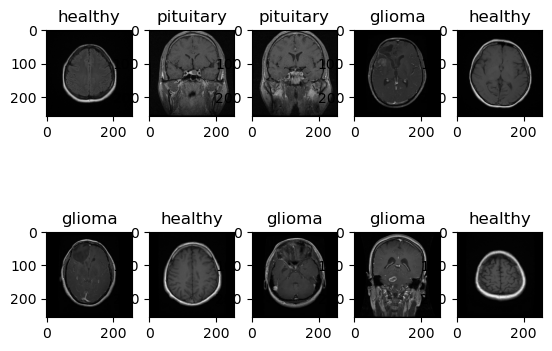

In [50]:
for image,label in train_data.take(10):
    for i in range(0,10):
        plt.subplot(2,5,i+1)
        img=image[i].numpy().astype("uint8")
        plt.imshow(img)
        plt.title(train_data.class_names[label[i]])

In [2]:
class_name=['glioma', 'healthy', 'meningioma', 'pituitary']

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,MaxPool2D,Conv2D
from  tensorflow.keras import layers
from tensorflow.keras.callbacks import  EarlyStopping

In [76]:
from tensorflow.keras.layers import RandomFlip,RandomZoom,Rescaling,Flatten

In [78]:
model=Sequential([
    layers.Rescaling(1./255,input_shape=(256, 256,3)),
    layers.RandomFlip(mode='horizontal',),
    layers.RandomZoom(height_factor=0.1,width_factor=0.1),
    layers.Conv2D(64,(4,4),activation="relu"),
    layers.MaxPool2D(pool_size=(3, 3)),
    layers.Dropout(0.30),
    layers.Conv2D(32,(4,4),activation="relu"),
    layers.MaxPool2D(pool_size=(3, 3)),
    layers.Dropout(0.30),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")])

D:\anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_13 (RandomFlip)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_11 (RandomZoom)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 253, 253, 64)        │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 84, 84, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 84, 84, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 81, 81, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 23328)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │       2,986,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,032,516 (11.57 MB)

 Trainable params: 3,032,516 (11.57 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
es=EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True)

In [109]:

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [89]:
history=model.fit(train_data,validation_data=validation_data,epochs=3,callbacks=[es])

Epoch 1/3
 14/322 ━━━━━━━━━━━━━━━━━━━━ 8:06 2s/step - accuracy: 0.9599 - loss: 0.1557

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq\\backend\\cython\\checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


KeyboardInterrupt: 

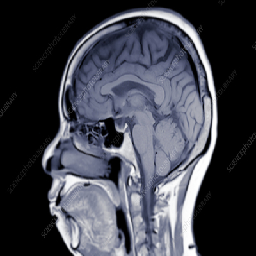

In [56]:
image=load_img(path=r"C:\Users\KINGNICKS-DELL\Downloads\400wm.jpg",target_size=(256,256,3))
image

In [57]:
pred_image=np.expand_dims(image,axis=0)

In [58]:
pred=Model.predict(pred_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [59]:
pred

array([[4.0658841e-01, 1.0807953e-04, 5.9329933e-01, 4.1607905e-06]],
      dtype=float32)

In [60]:
class_name=['glioma', 'healthy', 'meningioma', 'pituitary']
class_name[np.argmax(pred)]

'meningioma'

In [110]:
model.save("brain_mri_check.keras")

In [7]:
from tensorflow.keras.models import load_model

In [17]:
Model=load_model(r"C:\Users\KINGNICKS-DELL\Downloads\Brain_mri_CNN\brain_mri_check.keras")

In [10]:
Model.summary

<bound method Model.summary of <Sequential name=sequential_13, built=True>>